## Answer to Stage C quiz

## Question 1

You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 2000 examples in the test set. The confusion matrix of predicted class vs. actual class is:


What is the F1 score of this classifier?

#### Answer: 0.3177

## Question 2

Which method can we use to best fit a data in Logistic Regression?

#### Answer: Maximum Likelihood

## Question 3

Why do we use weak learners in boosting?

#### Answer: To make the algorithm stronger

## Question 4
A data scientist is evaluating different binary classification models. A false positive result is 5 times more expensive (from a business perspective) than a false negative result. The models should be evaluated based on the following criteria:

1) Must have a recall rate of at least 80%

2) Must have a false positive rate of 10% or less

3) Must minimize business costs

After creating each binary classification model, the data scientist generates the corresponding confusion matrix. Which confusion matrix represents the model that satisfies the requirements?

#### Answer: TN = 98%, FP = 2%, FN = 18%, TP = 82%

## Question 5
You are building a classifier and the accuracy is poor on both the training and test sets. Which would you use to try to improve the performance?

#### Answer: Boosting

## Question 6

Which of the following is not an Ensemble model?

#### Answer: Decision Tree

## Question 7

A classifier predicts if insurance claims are fraudulent or not. The cost of paying a fraudulent claim is higher than the cost of investigating a claim that is suspected to be fraudulent. Which metric should we use to evaluate this classifier?

#### Answer: Precision

## Question 8

The ROC curve above was generated from a classification algorithm. What can we say about this classifier?

#### Answer: The accuracy of the model is perfect



## Question 9
A random forest classifier was used to classify handwritten digits 0-9 into the numbers they were intended to represent. The confusion matrix below was generated from the results. Based on the matrix, which number was predicted with the least accuracy?

#### Answer: 0


## Question 10

A medical company is building a model to predict the occurrence of thyroid cancer. The training data contains 900 negative instances (people who don't have cancer) and 100 positive instances. The resulting model has 90% accuracy, but extremely poor recall. What steps can be used to improve the model's performance? (SELECT TWO OPTIONS

#### Answer: Use Boosting algorithm, Collect more data for the positive case


## Question 11

You are developing a machine learning classification algorithm that categorizes handwritten digits 0-9 into the numbers they represent. How should you pre-process the label data?

#### Answer: One-hot encoding

## Question 12

What is the entropy of the target variable if its actual values are given as:
[1,0,1,1,0,1,0]


#### Answer: 4/7 log(3/7) + 3/7 log(4/7)

## Question 13

Which of this is not a good metric for evaluating classification algorithms for data with imbalanced class problems?


#### Answer: Accuracy


## Question 14

What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

#### Answer: 0.9295


## Codes shown Below

## Importing all important libriaries

In [40]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score



df = pd.read_csv('Data_for_UCI_named.csv')

In [41]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [22]:
#Drop the stab column due to the direct relationship between stab and stabf
df.drop('stab', axis=1, inplace=True)

#split into X$y
X = df.drop('stabf', axis=1)
y = df['stabf']

#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#here we transform the train $ test set using StandardScaler
scaler = StandardScaler()
transform_train = pd.DataFrame(scaler.fit_transform(X_train))
tranform_test = pd.DataFrame(scaler.transform(X_test))

# Here we instantiate a Random forest classifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.929


## Question 15

What is the accuracy on the test set using the xgboost classifier? In 4 decimal places.

#### Answer: 0.9195

## Code Below

## NOTE: 
The reason for getting a different accuracy score(0.9455) on my jupyter notebook was because i just recently installed xgboost using pip,
however for this particualr score of (0.9195), i ran the code with Colab


In [23]:
clf = XGBClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9455


## Question 16

What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

#### Answer: 0.9375

## Code Below

In [27]:
lcf = LGBMClassifier(random_state=1)
lcf.fit(X_train, y_train)
y_pred = lcf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9375



## Question 17

To improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

#### Answer: N_estimators = 1000 , min_samples_split = 2 , min_samples_leaf = 8, max_features = None


## Code Below

In [30]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(1)

hyperparameter_grid = {'n_estimators': [50, 100, 300, 500, 1000],
        'min_samples_split':[2, 3, 5, 7, 9],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'max_features':  ['auto', 'sqrt', 'log2', None]}

# Split into X&y
X = df.drop('stabf', axis=1)
y = df['stabf']

# Split into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Extra tree classifier
ext = ExtraTreesClassifier()

# Setup RandomSearchCv
rs_clf = RandomizedSearchCV(estimator=ext,
                            param_distributions=hyperparameter_grid,
                            n_iter=10,
                            scoring='accuracy',
                            n_jobs=-1,
                            random_state=1,
                            cv=5,
                            verbose=1)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

rs_clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   56.3s finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

## Question 18

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

#### Answer: Lower

## Code Below

In [38]:
# Drop the stab column due to the direct relationship between stab and stabf
df.drop('stab', axis=1, inplace=True)

# Split into X$y
X = df.drop('stabf', axis=1)
y = df['stabf']

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Here we transform the train $ test set using StandardScaler
scaler = StandardScaler()
transform_train = pd.DataFrame(scaler.fit_transform(X_train))
tranform_test = pd.DataFrame(scaler.transform(X_test))


from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(random_state=1)
xtree.fit(X_train, y_train)
y_prediction = xtree.predict(X_test)
print(accuracy_score(y_test, y_prediction))

0.928


## The Accuracy score of the new Extra Tree Clssifier

In [42]:
#Drop the stab column due to the direct relationship between stab and stabf
df.drop('stab', axis=1, inplace=True)

# Split into X$y
X = df.drop('stabf', axis=1)
y = df['stabf']

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Here we transform the train $ test set using StandardScaler
scaler = StandardScaler()
transform_train = pd.DataFrame(scaler.fit_transform(X_train))
tranform_test = pd.DataFrame(scaler.transform(X_test))

# New hyperparameters from the RandomizedSearchCv
from sklearn.ensemble import ExtraTreesClassifier
ext_tree = ExtraTreesClassifier(n_estimators=1000,
                                random_state=1,
                                min_samples_split=2,
                                min_samples_leaf=8,
                                max_features=None)
ext_tree.fit(X_train, y_train)
ext_preds = ext_tree.predict(X_test)
print(accuracy_score(y_test, ext_preds))
#0.927

0.927


## Question 19

What other hyperparameter optimization methods can you try apart from Random Search?

#### Answer: All of the above


## Question 20

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?


#### Answer: tau2, p1

## Code Below

tau1    0.137240
tau2    0.140508
tau3    0.134680
tau4    0.135417
p1      0.003684
p2      0.005337
p3      0.005429
p4      0.004963
g1      0.102562
g2      0.107578
g3      0.113063
g4      0.109541
dtype: float64

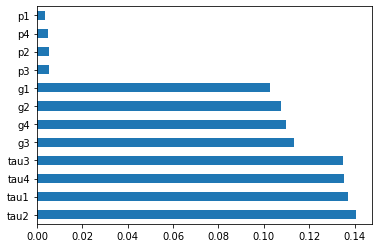

In [45]:
feature_importance = pd.Series(ext_tree.feature_importances_, index=X.columns)
#we use the barh to present the features in a horizontal bar plot
feature_importance.nlargest(12).plot(kind='barh') 
feature_importance

## THANK YOU!!!